In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
db_path = r'C:\Users\Owner\DABootcamp\sqlalchemy-challenge\Resources\hawaii.sqlite'
engine = create_engine(f"sqlite:///{db_path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.


most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date: {most_recent_date[0]}")

Most recent date: 2017-08-23


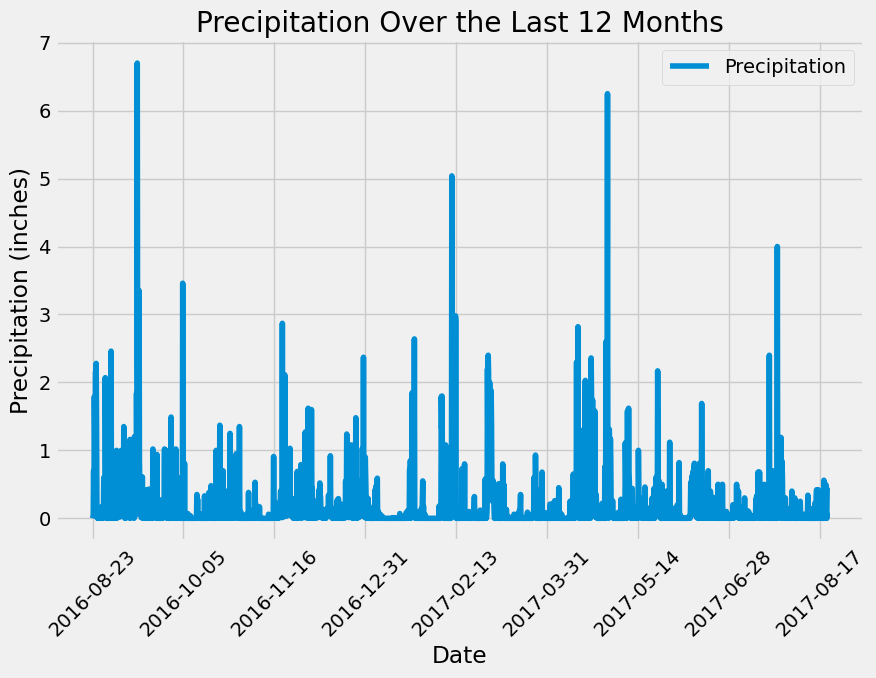

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')
year_ago_date = dt.date(last_date.year -1, last_date.month, last_date.day)
year_ago_date 

# Perform a query to retrieve the data and precipitation scores

query = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= year_ago_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation = pd.DataFrame(query, columns=['Date','Precipitation']).dropna(how='any')

# Sort the dataframe by date
precipitation = precipitation.sort_values(["Date"], ascending=True)
precipitation = precipitation.set_index("Date")

# Use Pandas Plotting with Matplotlib to plot the data
precipitation.plot(figsize=(9, 7))
plt.title("Precipitation Over the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics=precipitation.describe()
print(summary_statistics)

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.id)).\
    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()[0]

temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).first()

print(f"Most Active Station ID: {most_active}")
print(f"Lowest Temperature: {temp[0]}")
print(f"Highest Temperature: {temp[1]}")
print(f"Average Temperature: {temp[2]}")

Most Active Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


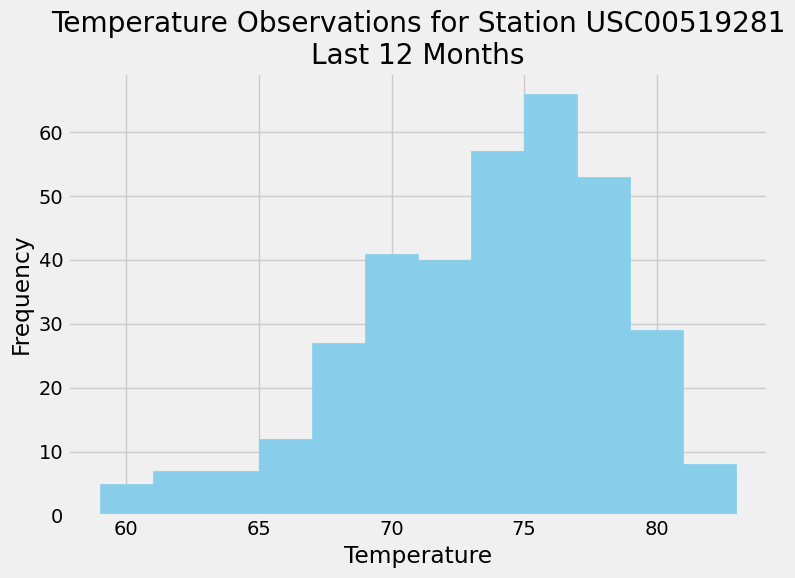

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active,Measurement.date >= year_ago_date).all()

# Save the query results as a Pandas DataFrame
temp_df = pd.DataFrame(temp_data, columns=['Date', 'Temperature']).dropna(how='any')

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temp_df['Temperature'], bins=12, color='skyblue', edgecolor='skyblue')
plt.title(f'Temperature Observations for Station {most_active}\nLast 12 Months')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [18]:
# Close Session
session.close()